In [1]:
# load the required packages
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
%matplotlib inline

/home/xuyuan/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_9025/2930663500.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly 

In [2]:
data = pd.read_stata(r'../regression analysis/regression_analysis.dta')
data['geometry'] = data['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(data, geometry = data.geometry, crs = 'epsg:4326')
# Convert the unique cities and years into lists for iteration
cities = data['city'].unique()
city_label = cities
city_label = np.where(city_label == 'xian', "xi'an", city_label)
years = sorted(data['year'].unique())
# export to the csv
# sample_data = data.sample(n = 100, random_state = 1)
# sample_data.to_csv('check result.csv', index = False)

In [3]:
data_list = []
dental_number = []
name_list = []
for city in cities:
    for year in years:
        dataframe = data[data['city'] == city]
        dataframe = dataframe[dataframe['year'] == year]
        name = str(city) + " " + str(year)
        data_number = dataframe['kou'].sum()
        dental_number.append(data_number)
        data_list.append(dataframe)
        name_list.append(name)

/tmp/ipykernel_9025/2278630977.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # Use a white grid style for a clean look


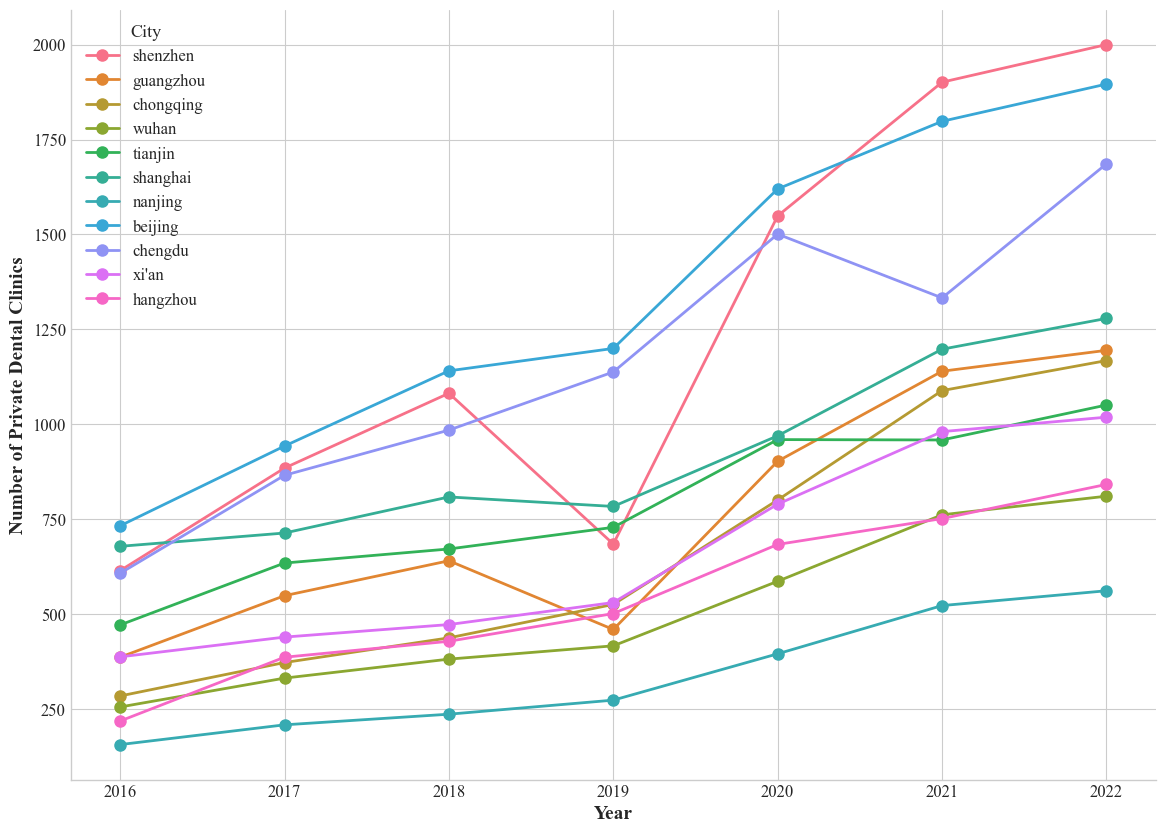

In [4]:
# Set the style of the matplotlib
plt.style.use('seaborn-whitegrid')  # Use a white grid style for a clean look
plt.rcParams["font.family"] = "Times New Roman"
# Create a color palette
palette = sns.color_palette("husl", len(cities))

# Create a figure object and set the figure facecolor to 'none' for transparency
plt.figure(figsize=(14, 10), facecolor='none')
for i, city in enumerate(cities):
    city_years = [int(year) for name in name_list if city in name for year in name.split() if year.isdigit()]
    city_kou_values = [dental_number[i] for i, name in enumerate(name_list) if city in name]
    plt.plot(city_years, city_kou_values, marker='o', linestyle='-', color=palette[i], label=city_label[i], linewidth=2, markersize=8)

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Private Dental Clinics', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set legend with a transparent background
plt.legend(fontsize=12, title="City", title_fontsize='13', loc='upper left', frameon=False)

# Set the axes background color to 'none' for transparency
plt.gca().set_facecolor('none')

# Remove the top and right spines
sns.despine()

# Save the figure with high resolution and transparent background
# plt.savefig('private_dental_clinics_by_city_and_year.png', dpi=300, bbox_inches='tight', transparent=True)
plt.savefig('private_dental_clinics_by_city_and_year.tiff', bbox_inches='tight', dpi=400)
plt.show()

```
gdp_data = pd.read_excel('gdp/gdp for eleven cities.xls')

gdp_list = []
gdp_name_list = []
for city in cities:
    i = gdp_data[gdp_data['Region'] == city].index[0]
    for year in years:
         
        gdp_name = gdp_data['Region'][i] + " " + str(year)
        gdp_name_list.append(gdp_name)
        gdp_list.append(gdp_data[str(year)][i])
        
list_to_plot = dental_number / gdp_number
```